In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Load Task Image

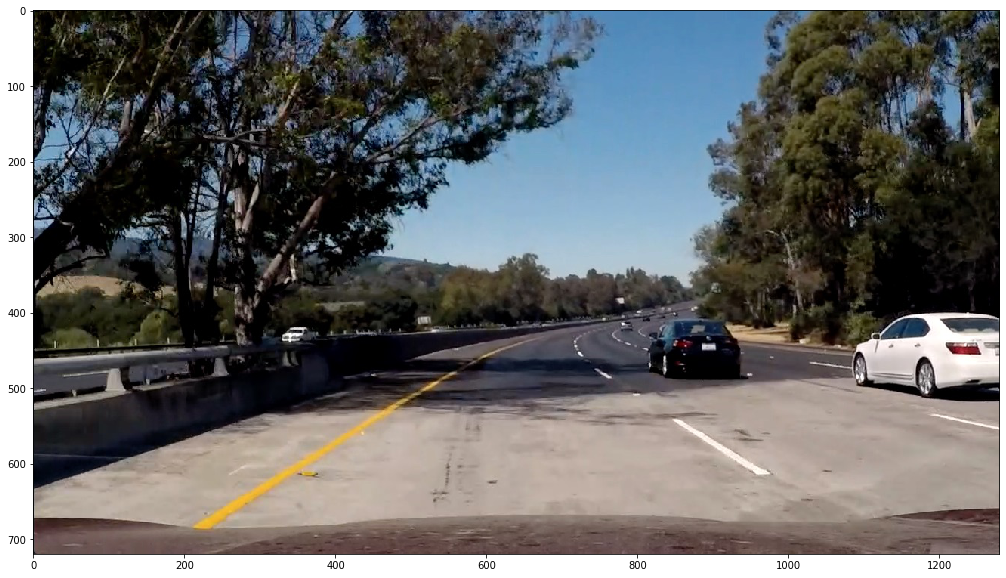

In [13]:
task_image = mpimg.imread('./test5.jpg')
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(task_image)

## Sobel X / Y Threshold

In [14]:
def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(0, 255)):
    grayscale =  cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    if(orient == 'x'):
        sobel_value = cv2.Sobel(grayscale, cv2.CV_64F, 1, 0, ksize=5)
    else:
        sobel_value = cv2.Sobel(grayscale, cv2.CV_64F, 0, 1, ksize=5)
    sobel_value = np.absolute(sobel_value)
    abs_sobel = np.uint8(255*sobel_value/np.max(sobel_value))
    low, high = thresh
    return np.where((abs_sobel >= low) & (abs_sobel <= high), 255, 0)

## Sobel Magnitude Threshold

In [15]:
def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    grayscale =  cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobel_value_x = cv2.Sobel(grayscale, cv2.CV_64F, 1, 0, ksize=5)
    sobel_value_y = cv2.Sobel(grayscale, cv2.CV_64F, 0, 1, ksize=5)
    sobel_value = np.sqrt(np.square(sobel_value_x)+np.square(sobel_value_y))
    gradmag = np.uint8(255*sobel_value/np.max(sobel_value))
    low, high = mag_thresh
    return np.where((gradmag >= low) & (gradmag <= high), 255, 0)

## Sobel Direction Threshold

In [16]:
def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    grayscale =  cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobel_value_x = cv2.Sobel(grayscale, cv2.CV_64F, 1, 0, ksize=5)
    sobel_value_y = cv2.Sobel(grayscale, cv2.CV_64F, 0, 1, ksize=5)
    absgraddir = np.arctan2(sobel_value_y, sobel_value_x)
    absgraddir = np.uint8(255*absgraddir/np.max(absgraddir))
    low, high = thresh
    return np.where((absgraddir >= low) & (absgraddir <= high), 255, 0)

## Visualize Sobel Thresholds Results

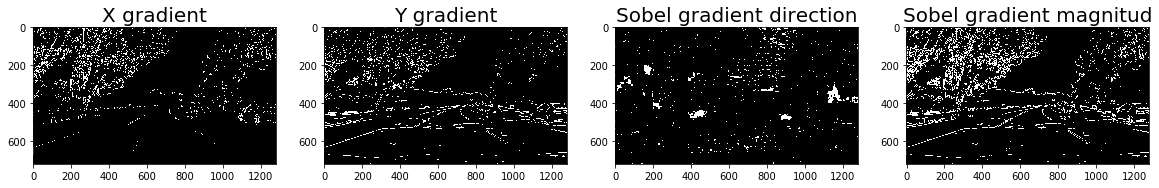

In [17]:
x_sobel = abs_sobel_thresh(task_image, 'x',thresh=(40,150))
y_sobel = abs_sobel_thresh(task_image, 'y',thresh=(40,150))
mag_sobel = mag_thresh(task_image, mag_thresh=(40,150))
dir_sobel = dir_threshold(task_image, thresh=(0,np.pi/2))

f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('X gradient', fontsize=20)
ax1.imshow(x_sobel,cmap='gray')

ax2.set_title('Y gradient', fontsize=20)
ax2.imshow(y_sobel,cmap='gray')

ax3.set_title('Sobel gradient direction', fontsize=20)
ax3.imshow(dir_sobel,cmap='gray')

ax4.set_title('Sobel gradient magnitud', fontsize=20)
ax4.imshow(mag_sobel,cmap='gray')